In [304]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [305]:
data_b_NO2=pd.read_excel("/content/PM2_5_Data.xlsx",sheet_name='Liverpool')

In [306]:
check=pd.read_excel("/content/checkPM25.xlsx")

In [307]:
check.head()

,Annual_Mean,Band
0,1,Low
1,2,Low
2,3,Low
3,4,Low
4,5,Low


In [308]:
df_b_NO2=data_b_NO2.groupby('Year').agg(PM25_Liverpool=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,PM25_Liverpool
0,2000,11.0
1,2001,12.0
2,2002,11.0
3,2003,12.0
4,2004,12.0


In [309]:
year=df_b_NO2['Year']
y_test=df_b_NO2['PM25_Liverpool']

In [310]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [311]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [312]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [313]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [314]:
svm_classifier = SVC(kernel='linear', C=2.0)

In [315]:
svm_classifier.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [316]:
y_pred = svm_classifier.predict(X_test)

In [317]:
y_pred

array(['Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [318]:
df_b_NO2

,Year,PM25_Liverpool
0,2000,11.0
1,2001,12.0
2,2002,11.0
3,2003,12.0
4,2004,12.0
5,2005,11.0
6,2006,12.0
7,2007,11.0
8,2008,12.0
9,2009,12.0


In [319]:
classified_df=pd.DataFrame()

In [320]:
classifed_df=df_b_NO2[['Year','PM25_Liverpool']]

In [321]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [322]:
classifed_df

,Year,PM25_Liverpool,Checkpoints
0,2000,11.0,Moderate
1,2001,12.0,Moderate
2,2002,11.0,Moderate
3,2003,12.0,Moderate
4,2004,12.0,Moderate
5,2005,11.0,Moderate
6,2006,12.0,Moderate
7,2007,11.0,Moderate
8,2008,12.0,Moderate
9,2009,12.0,Moderate


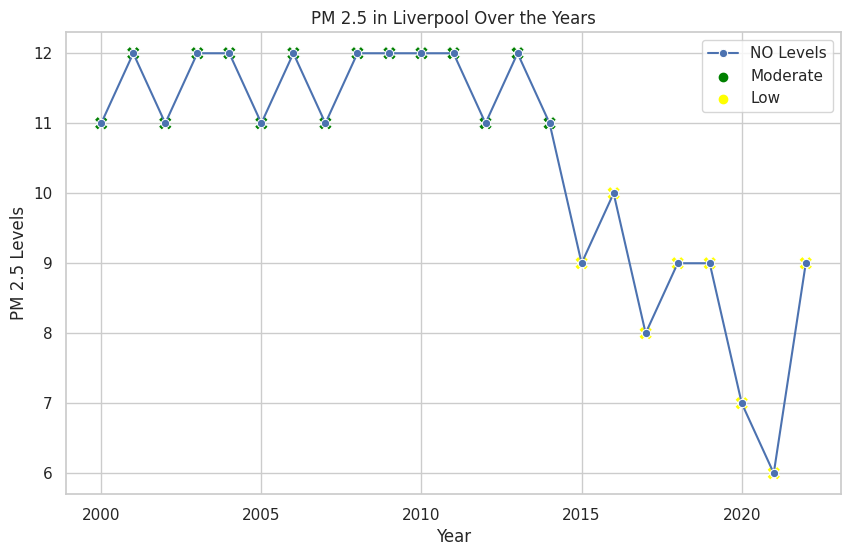

In [323]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='PM25_Liverpool', data=classifed_df, marker='o', label='NO Levels')
sns.scatterplot(x='Year', y='PM25_Liverpool', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])
plt.xlabel('Year')
plt.ylabel('PM 2.5 Levels')
plt.title('PM 2.5 in Liverpool Over the Years')
plt.legend()
plt.show()


In [324]:
from google.colab import files

In [325]:
csv_file_path = '/content/classified_Liverpool_PM25.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [326]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>